# HW6

The goal of this HW is to use decision trees to find what made it more or less likely to survive the Titanic sinking in 1912.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

Populating the interactive namespace from numpy and matplotlib


## Cleaning

We will start by cleaning the data set. This part is already done it for you. So, you should just execute the code below.

In [2]:
df = pd.read_csv("titanic.csv")

Get rid of useless attributes

In [3]:
df.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1, inplace=True)

Binarize gender

In [4]:
df['Male'] = df.Sex == 'male'

In [5]:
df.drop(['Sex'], axis=1, inplace=True)

Make dummy variables for port of origin

In [6]:
df = pd.get_dummies(data=df,columns=['Embarked'])

Remove the nulls

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Male          891 non-null bool
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: bool(1), float64(2), int64(4), uint8(3)
memory usage: 45.3 KB


In [8]:
df.isna().any()

Survived      False
Pclass        False
Age            True
SibSp         False
Parch         False
Fare          False
Male          False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [9]:
df.Age.isna().sum()

177

In [10]:
len(df)

891

In [11]:
df.dropna(inplace=True)

In [12]:
len(df)

714

In [13]:
len(df) + 177 == 891

True

In [14]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,0,0,1
1,1,1,38.0,1,0,71.2833,False,1,0,0
2,1,3,26.0,0,0,7.9250,False,0,0,1
3,1,1,35.0,1,0,53.1000,False,0,0,1
4,0,3,35.0,0,0,8.0500,True,0,0,1


## Data set description
After cleaning, we have a DataFrame df, which reports the passengers of the Titanic (one row per passenger). The columns are:
<ul>
<li><b>Survived</b>: binary attribute that indicates whether the passenger survived. This is the dependent variable that we will attempt to explain
<li><b>Pclass</b>: Ticket class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
<li><b>Age</b>: Passenger age
<li><b>SibSp</b>: The amout of the passenger's siblings/spouses aboard the Titanic
<li><b>Parch</b>: The amout of the passenger's parents/children aboard the Titanic
<li><b>Fare</b>: The ticket fare
<li><b>Male</b>: binary attibute that indicates the gender (1=Male, 0=Female)
<li><b>Embarked_C</b>: binary attibute that indicates whether the passenger embarked in Cherbourg
<li><b>Embarked_Q</b>: binary attibute that indicates whether the passenger embarked in Queenstown
<li><b>Embarked_S</b>: binary attibute that indicates whether the passenger embarked in Southampton
</ul>

### Question 1

<b>Build</b> and <b>show</b> a decision tree of <b>depth = 1</b> (i.e., one root and two leaf nodes) to find the differences between those who survived and those who didn't. (In Camino, pick the answer with the right description)

In [15]:
X = df.drop('Survived',axis=1)

In [16]:
Y = df.Survived

In [17]:
survive_tree = tree.DecisionTreeClassifier(max_depth=1)
survive_tree.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

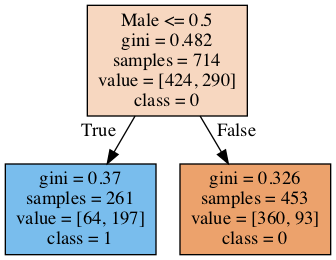

In [18]:
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(survive_tree, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Question 2

In **at most 10 words**, explain what the decision tree tells us. Write your answer in a markdown cell. (In Camino, fill the same sentence into the blank)

Answer: **Higher likelihood for women to survive than men.**

### Question 3

Use **one** seaborn command to draw a bar chart to **statistically** validate what you found in the previous question. (In Camino, fill in the program code line you used) 

/Users/KI/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


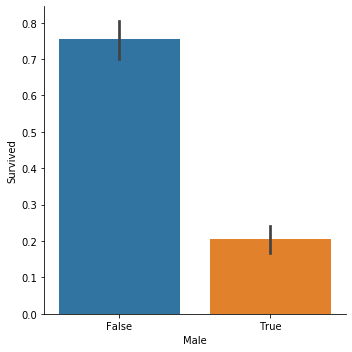

In [19]:
sns.factorplot(x='Male',y='Survived',data=df,kind='bar')
#Gives the Rate of Survival for men(True) and for women(False)

In [20]:
len(df[(df.Male==True)&(df.Survived==1)])/len(df[df.Male==True])

0.2052980132450331

In [21]:
len(df[(df.Male==False)&(df.Survived==1)])/len(df[df.Male==False])

0.7547892720306514

### Question 4

<b>Build</b> and <b>show</b> a decision tree of <b>depth = 2</b> to find the differences between those who survived and those who didn't. Your tree should have four leaves. (In Camino, pick the 3 attributes/predictors decision tree used to build the tree.)

In [22]:
X1 = df.drop('Survived',axis=1)
Y1 = df.Survived

In [23]:
survive_tree1 = tree.DecisionTreeClassifier(max_depth=3)
survive_tree1.fit(X1,Y1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

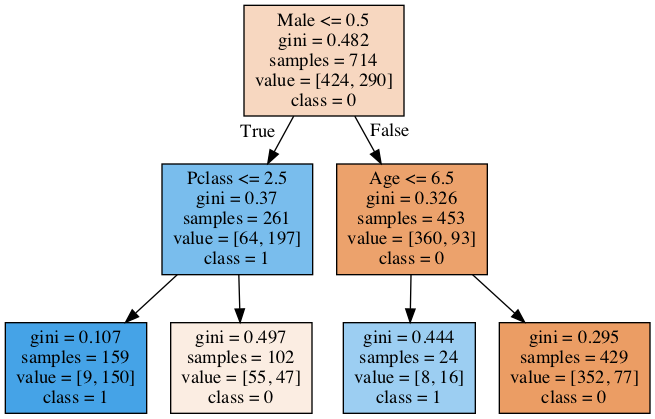

In [24]:
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(survive_tree1, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Question 5

The tree found in your previous question should involve three predictors. Guided from what the tree tells you, detect an interesting finding involving <b>two</b> of these three predictors and show its validity through seaborn. 
<p><b>Format and grading:</b> For this question, you will be graded on <b>the first two Jupyter cells following this cell</b> (<b>the following cells will be ignored, without exception</b>). The first cell following this cell must be a markdown cell with your finding written in English. The second cell must contain the code that builds a seaborn chart: this chart must <b>statistically</b> validate your finding. 

### Q5.1,  First solution (right side of tree) (In Camino, fill in the seaborn command you used to draw the chart)

Markdown cell:

For the right side, machine learning tells us that if we group males into two groups; one comprised of males under or equal to 6.5 years old and the other for males older than 6.5 years old; the group under 6.5 years old has a greater rate of survival. (We are of course referring to within-group survival rate)

Code cell:

/Users/KI/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


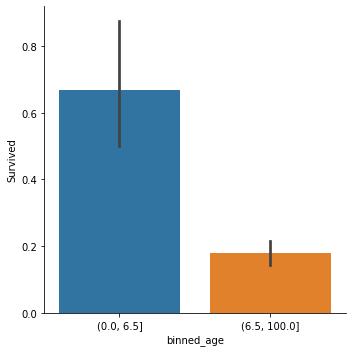

In [25]:
df['binned_age'] = pd.cut(df['Age'],bins=[0,6.5,100])
sns.factorplot(x='binned_age',y='Survived',data=df[df.Male==1],kind='bar')

### Q5.2, Second solution (left side of tree) (In Camino, fill in the seaborn command you used to draw the chart)

Markdown cell:

The decision tree tells us that, amongst women, women in the lower ticket classes were more likely to survive. (We are of course referring to within-ticket class survival rate)

Code cell:

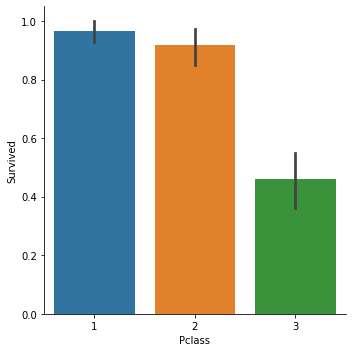

In [26]:
sns.factorplot(x='Pclass',y='Survived',data=df[df.Male==0],kind='bar')